In [1]:
%matplotlib inline 
#pracitce
#change 3
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split, this does not work, found that the one above works
from scipy.stats import chisquare, ks_2samp
import numpy as np

In [2]:
# Reading the data into python #added my path to it
data=pd.read_csv("~/Documents/Discharge-Planning-App/Hospital-Readmission-Prediction/training_data.csv",header=0,skiprows=0,engine='python')
data.shape

(81414, 50)

In [3]:
# printing out first 5 observations
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,N
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,N
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,N
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,N
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,N


In [4]:
#Printing all the columns in the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81414 entries, 0 to 81413
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              81414 non-null  int64 
 1   patient_nbr               81414 non-null  int64 
 2   race                      81414 non-null  object
 3   gender                    81414 non-null  object
 4   age                       81414 non-null  object
 5   weight                    81414 non-null  object
 6   admission_type_id         81414 non-null  int64 
 7   discharge_disposition_id  81414 non-null  int64 
 8   admission_source_id       81414 non-null  int64 
 9   time_in_hospital          81414 non-null  int64 
 10  payer_code                81414 non-null  object
 11  medical_specialty         81414 non-null  object
 12  num_lab_procedures        81414 non-null  int64 
 13  num_procedures            81414 non-null  int64 
 14  num_medications       

In [5]:
#Descriptive statistics of all the rows
print(data.describe())

       encounter_id   patient_nbr  admission_type_id  \
count  8.141400e+04  8.141400e+04       81414.000000   
mean   1.652012e+08  5.430959e+07           2.020918   
std    1.025322e+08  3.869402e+07           1.445327   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.507868e+07  2.340358e+07           1.000000   
50%    1.524402e+08  4.553196e+07           1.000000   
75%    2.301472e+08  8.750457e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count              81414.000000         81414.000000      81414.000000   
mean                   3.709878             5.753777          4.398334   
std                    5.267986             4.052119          2.985424   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000

Before we do analysis we need to make sure that there are no duplicate rows. By looking at the data we can confirm that encounter_id is unique and we are checking if there are any duplicate encounter_ids and we find that there aren't any.

In [7]:
ids = data['encounter_id']
data[ids.duplicated()]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


In [8]:
#checking if there are any duplicates in encounter_id - no duplicates found
ids = data['encounter_id']
data[ids.isin(ids[ids.duplicated()])]
#no duplicates found

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


In [10]:
# Considering values with '?' as missing values.
data = data.replace('?', np.NaN )

In [11]:
#One observation is unknown in gender. Replace it as a null value
print('gender', data['gender'][data['gender'] == 'Unknown/Invalid'].count())
data = data.replace('Unknown/Invalid', np.NaN )

gender 2


In [12]:
#finding the number of null values in each column
print(data.isnull().sum())

encounter_id                    0
patient_nbr                     0
race                         1813
gender                          2
age                             0
weight                      78844
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  32231
medical_specialty           39935
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         18
diag_2                        288
diag_3                       1125
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Any row that has more than 40% missing values is rejected.

In [13]:
# Weight has almost 99% of missing data ; Payer_code and medical_speciality has around 45% of missing data. 
#It's better to drop these two as well since there are many categories 
data.drop(['weight','payer_code','medical_specialty','diag_2', 'diag_3'],axis=1,inplace=True)
data.shape

(81414, 45)

In [14]:
#Dropping rows with missing values
data.dropna(inplace=True)
data.shape

(79584, 45)

In [15]:
data[0:3]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,N
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,N
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,N


In [16]:
#creating a list of categorical and numeric columns names
categorical=data.select_dtypes(include=['object'])
numeric=data.select_dtypes(exclude=['object'])
print(categorical.columns.values)
print(numeric.columns.values)

['race' 'gender' 'age' 'diag_1' 'max_glu_serum' 'A1Cresult' 'metformin'
 'repaglinide' 'nateglinide' 'chlorpropamide' 'glimepiride'
 'acetohexamide' 'glipizide' 'glyburide' 'tolbutamide' 'pioglitazone'
 'rosiglitazone' 'acarbose' 'miglitol' 'troglitazone' 'tolazamide'
 'examide' 'citoglipton' 'insulin' 'glyburide-metformin'
 'glipizide-metformin' 'glimepiride-pioglitazone'
 'metformin-rosiglitazone' 'metformin-pioglitazone' 'change' 'diabetesMed'
 'readmitted']
['encounter_id' 'patient_nbr' 'admission_type_id'
 'discharge_disposition_id' 'admission_source_id' 'time_in_hospital'
 'num_lab_procedures' 'num_procedures' 'num_medications'
 'number_outpatient' 'number_emergency' 'number_inpatient'
 'number_diagnoses']


In [17]:
#printing the frequency count of all the categorical features
for col in categorical:
    print(categorical[col].value_counts())

Caucasian          60836
AfricanAmerican    15406
Hispanic            1615
Other               1215
Asian                512
Name: race, dtype: int64
Female    42850
Male      36734
Name: gender, dtype: int64
[70-80)     20412
[60-70)     17654
[80-90)     13470
[50-60)     13453
[40-50)      7531
[30-40)      2957
[90-100)     2163
[20-30)      1278
[10-20)       539
[0-10)        127
Name: age, dtype: int64
428    5330
414    5073
786    3157
410    2818
486    2768
       ... 
895       1
657       1
637       1
98        1
698       1
Name: diag_1, Length: 693, dtype: int64
None    75379
Norm     2020
>200     1182
>300     1003
Name: max_glu_serum, dtype: int64
None    66266
>8       6403
Norm     3939
>7       2976
Name: A1Cresult, dtype: int64
No        64041
Steady    14277
Up          817
Down        449
Name: metformin, dtype: int64
No        78366
Steady     1088
Up           95
Down         35
Name: repaglinide, dtype: int64
No        79020
Steady      535
Up           20
D

In [18]:
#printing the frequency of all the numeric features
for col in numeric:
    print(numeric[col].value_counts())
# Didn't find any outliers

116046918    1
156142020    1
44001720     1
106920378    1
31279548     1
            ..
167599554    1
45102444     1
256779630    1
69338310     1
77856768     1
Name: encounter_id, Length: 79584, dtype: int64
88785891    33
43140906    25
88227540    22
1660293     21
88789707    19
            ..
43121745     1
2570319      1
3352653      1
27841248     1
93251151     1
Name: patient_nbr, Length: 58521, dtype: int64
1    42435
3    14727
2    14201
6     4168
5     3768
8      262
7       16
4        7
Name: admission_type_id, dtype: int64
1     47025
3     10886
6     10162
18     2924
2      1656
22     1606
11     1305
5       910
25      759
4       598
7       497
13      318
23      316
14      281
28      103
8        84
15       56
24       43
9        16
16       11
17       11
19        6
10        5
12        3
27        2
20        1
Name: discharge_disposition_id, dtype: int64
7     45435
1     23011
17     5305
4      2388
6      1592
2       820
5       672
3       

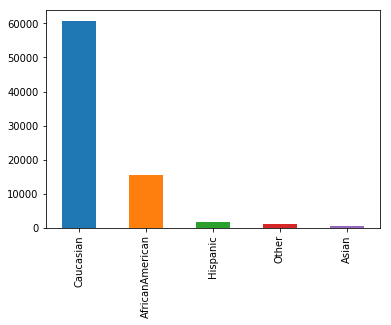

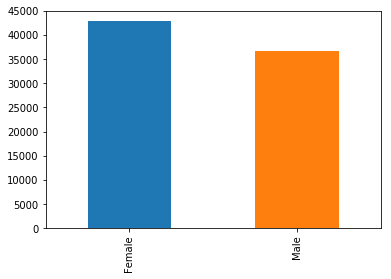

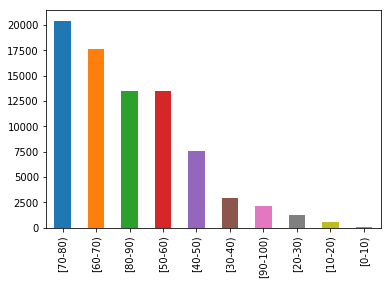

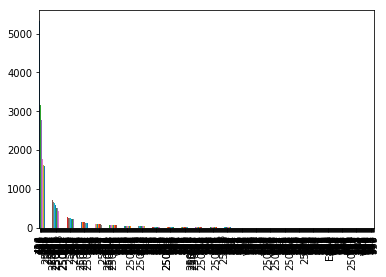

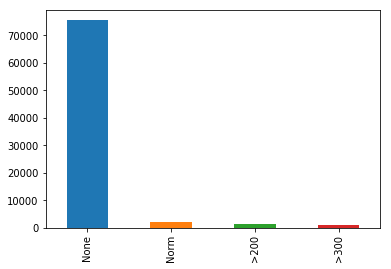

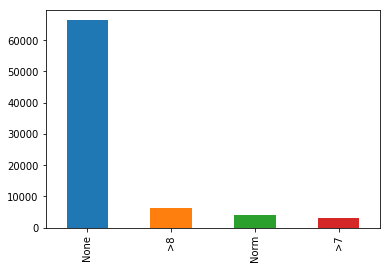

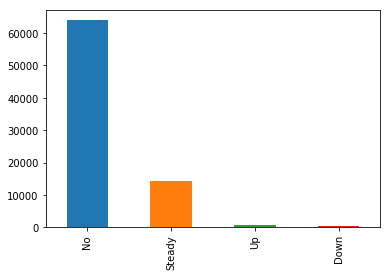

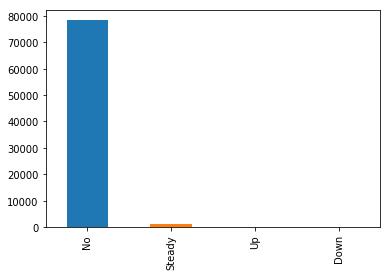

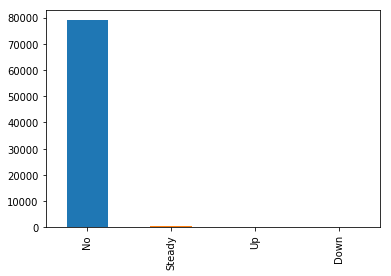

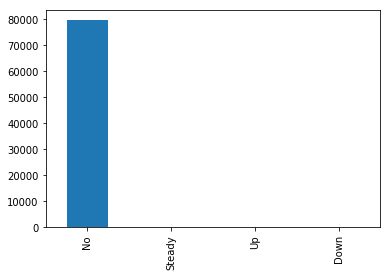

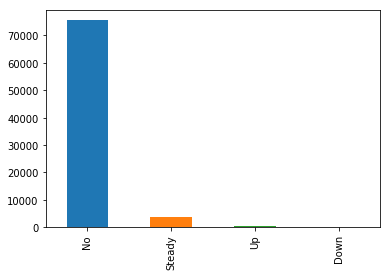

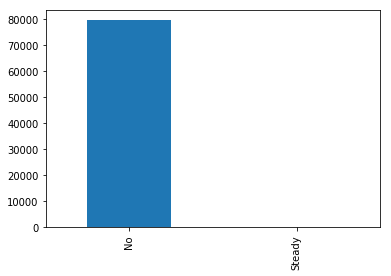

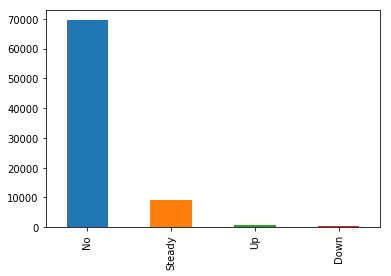

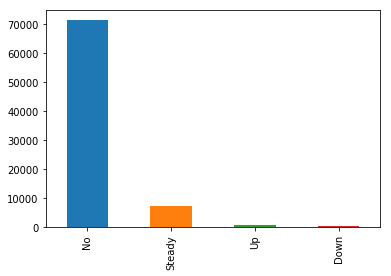

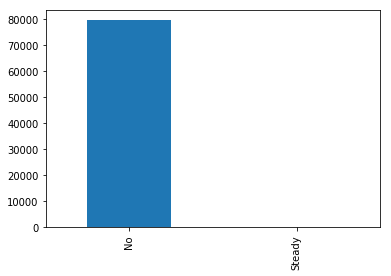

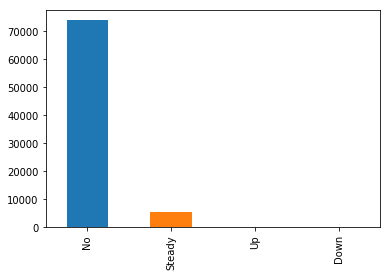

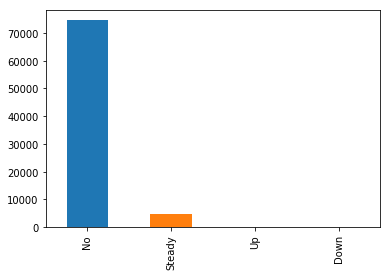

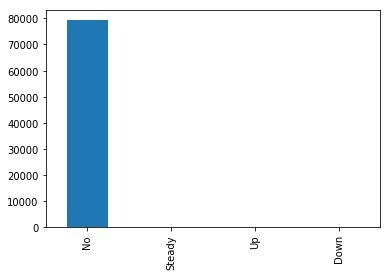

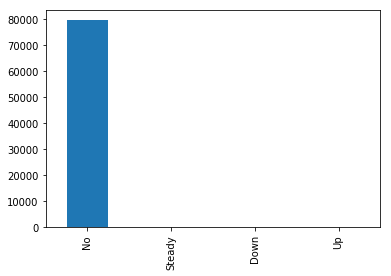

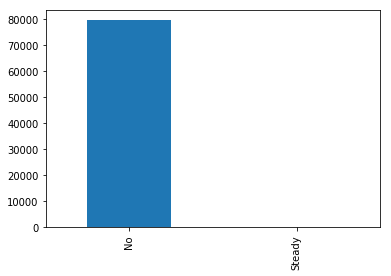

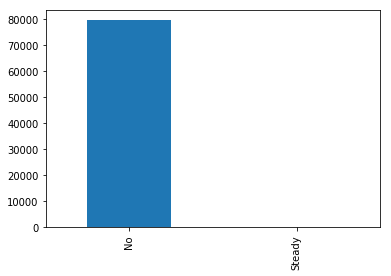

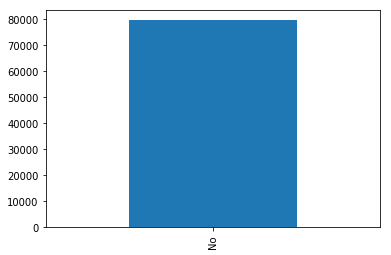

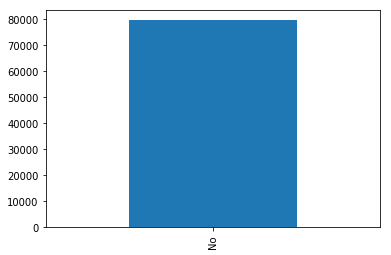

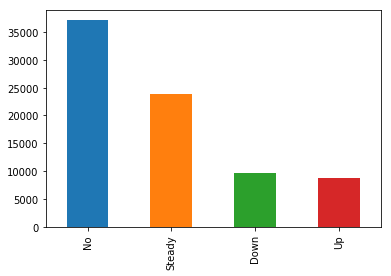

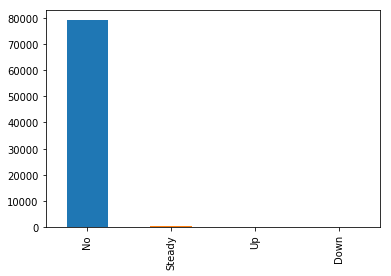

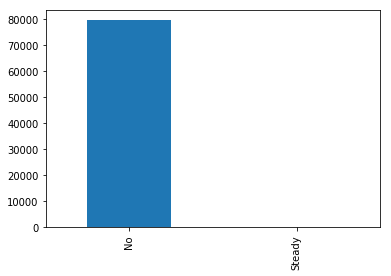

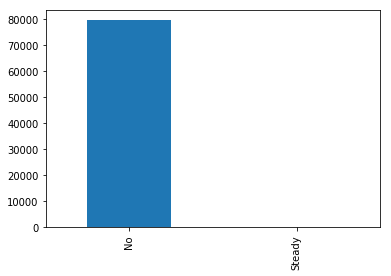

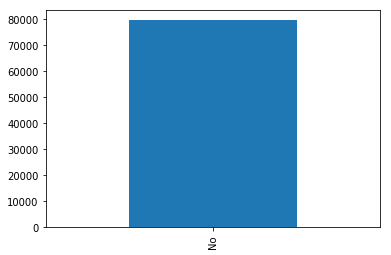

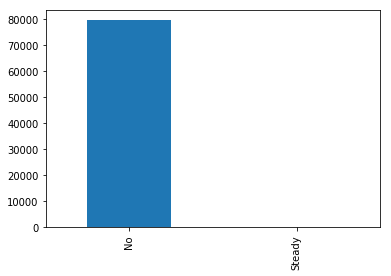

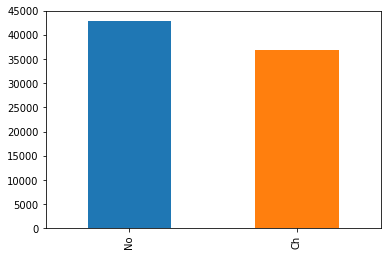

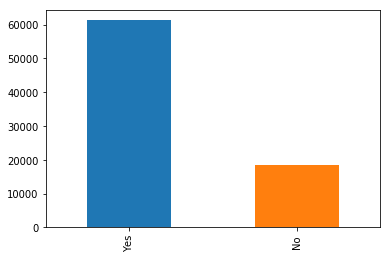

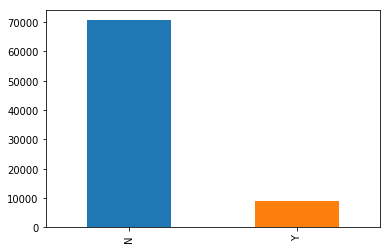

In [18]:
for col in categorical:
    categorical[col].value_counts().plot(kind='bar')
    plt.show()
    

In [19]:
data['max_glu_serum'].unique()

array(['None', '>300', 'Norm', '>200'], dtype=object)

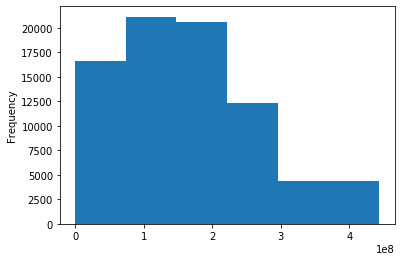

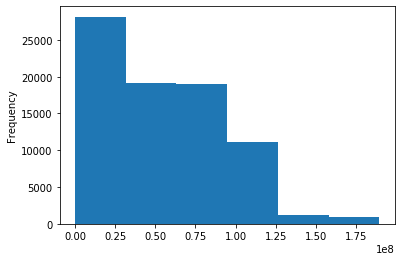

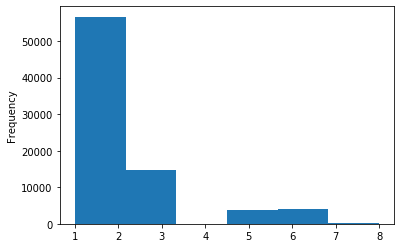

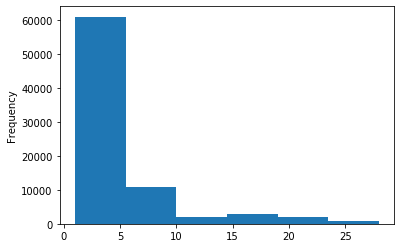

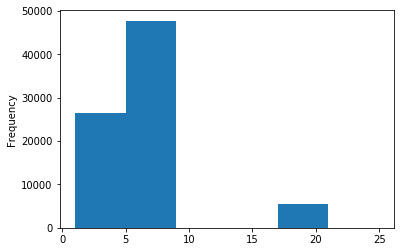

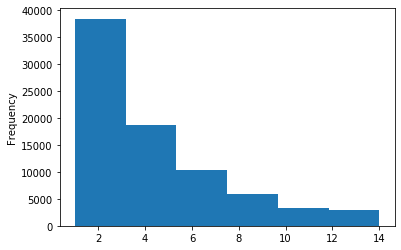

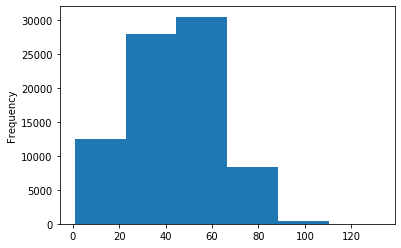

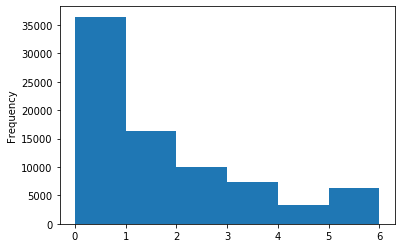

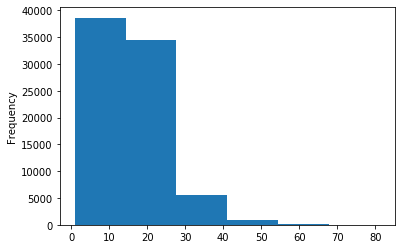

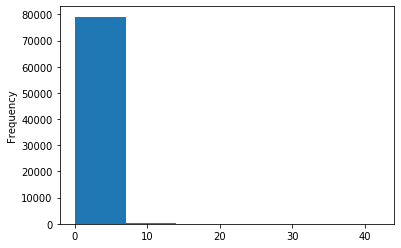

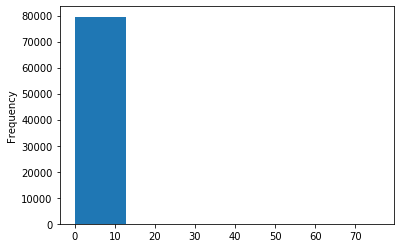

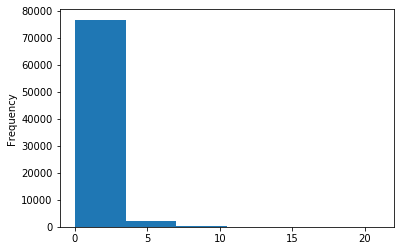

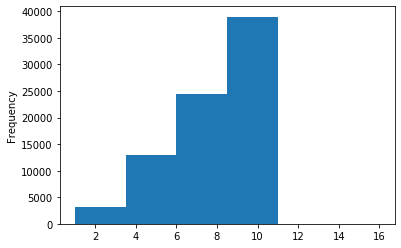

In [20]:
for col in numeric:
    numeric[col].plot.hist(bins=6)
    plt.show()

In [21]:
# Deleting the 2 columns because they have all the observations only in one category 
data.drop(['examide','citoglipton'],axis=1,inplace=True)
data.shape

(79584, 43)

In [22]:
#Making the target variable and other variables binary
data = data[data['readmitted'].isin(['Y', 'N'])]
data['readmitted'] = data['readmitted'].apply(lambda x: 0 if x == "N" else 1)
data['change'] = data['change'].apply(lambda x: 0 if x == "No" else 1)
data['gender'] = data['gender'].apply(lambda x: 0 if x == "Female" else 1)
data['diabetesMed'] = data['diabetesMed'].apply(lambda x: 0 if x == "No" else 1)
data.shape

(79584, 43)

In [23]:
# There are 3 types of visits to a hospital. 1) Inpatient 2) Outpatient 3) Emergency.
# Combining them into a single column
data['total_visits'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']

We have age feature which is given in bins. We have to changed it with the average value. eg: for age 0-10 we took the average age which is 5.

In [24]:
#defining a function to give average value for the age
def agecategory(x):
    
    if x == "[0-10)" :
        return 5
    elif x == "[10-20)":
        return 15
    elif x == "[20-30)":
        return 25
    elif x == "[30-40)":
        return 35
    elif x == "[40-50)":
        return 45
    elif x == "[50-60)":
        return 55
    elif x == "[60-70)":
        return 65
    elif x == "[70-80)":
        return 75
    else:
        return 0
        

In [25]:
#replacing the age bins with their average value
data['age'] = data['age'].apply(lambda x: agecategory(x))

In [26]:
data['age'][:10]

0     5
1    15
2    25
3    35
4    45
5    55
6    65
7    75
8     0
9    45
Name: age, dtype: int64

There are 23 treatments of which 2 treatments are never used by patients and we took the number of treatments the patient has undergone as a feature which will be used for analysis.

In [28]:
#It seems like there are many treatments from which a doctor would recommend the patient, lets combine all the\
#treatments into one dataframe
treatments = ['metformin' ,'repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide' ,'glipizide',\
              'glyburide', 'tolbutamide', 'pioglitazone','rosiglitazone', 'acarbose' ,'miglitol' ,'troglitazone', \
              'tolazamide', 'insulin' ,'glyburide-metformin','glipizide-metformin', \
              'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

In [29]:
print(treatments)

['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']


In [30]:
#assigning a value of 0 if there are not undergoing treatment and assigning 1 even if they are taking \
#increasing/decreasing/steady dosage
for i in treatments:
    data[i] = data[i].apply(lambda x: 0 if x == "No" else 1)

In [31]:
#finding out total number of treatments taken by patient
data['treatments_taken'] = np.zeros((len(data['metformin'])))
for col in treatments:
    data['treatments_taken'] += data[col]

In [32]:
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,total_visits,treatments_taken
0,2278392,8222157,Caucasian,0,5,6,25,1,1,41,...,0,0,0,0,0,0,0,0,0,0.0
1,149190,55629189,Caucasian,0,15,1,1,7,3,59,...,0,0,0,0,0,1,1,0,0,1.0
2,64410,86047875,AfricanAmerican,0,25,1,1,7,2,11,...,0,0,0,0,0,0,1,0,3,1.0
3,500364,82442376,Caucasian,1,35,1,1,7,2,44,...,0,0,0,0,0,1,1,0,0,1.0
4,16680,42519267,Caucasian,1,45,1,1,7,1,51,...,0,0,0,0,0,1,1,0,0,2.0


In [33]:
# AIC > 6.4 implies that the patient has diabetes. Therefore, considered values greater than 7 and 8 together.
# other 2 categories : Norm and None ; Norm implies the values in the normal range ; None implies no test conducted;
data['A1Cresult'] = data['A1Cresult'].apply(lambda x: 0 if x == "None" else (1 if x=="Norm" else 2) )
data['max_glu_serum'] = data['max_glu_serum'].apply(lambda x: 0 if x == "None" else (1 if x=="Norm" else 2) )

In [34]:
#Based on information in https://www.hindawi.com/journals/bmri/2014/781670/tab2/.Classified diagnosis into 9 categories
#Categories[0-8]: Other,Circulatory, Respiratory,Digestive, Diabetes,Injury, Musculoskeletal,Genitourinary,Neoplasms
#defining the function to classify the numbers into one of the 8 categories

def getCategor(x):
    if 'V' in str(x) or 'E' in str(x):
        return 0
    
    x = float(x)
    
    if (x >= 390 and x <= 459) or np.floor(x) == 785:
        return 1
    elif (x >= 460 and x <= 519) or np.floor(x) == 786:
        return 2
    elif (x >= 520 and x <= 579) or np.floor(x) == 787:
        return 3
    elif np.floor(x) == 250:
        return 4
    elif x >= 800 and x <= 999:
        return 5
    elif x >= 710 and x <= 739:
        return 6
    elif (x >= 580 and x <= 629) or np.floor(x) == 788:
        return 7
    elif x >= 140 and x <= 239:
        return 8
    else:
        return 0
        

In [35]:
#changing the values into categories
data['diag_1_category'] = data['diag_1'].apply(lambda x: getCategor(x))

In [36]:
data['diag_1_category'][:10]

0    4
1    0
2    0
3    0
4    8
5    1
6    1
7    1
8    1
9    4
Name: diag_1_category, dtype: int64

In [35]:
list(data)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted',
 'total_visits',
 'treatments_taken',
 'diag_1_category']

Some patients in the data have more than one encounters, we need to make sure to remove the multiple patient visits because that might cause bias in our predictions. For that reason we remove all the visits by a patient other than their first visit.

In [37]:
#Check for readmitted patients and remove all visits other than the 1st visit
patients = data['patient_nbr']
data[patients.isin(patients[patients.duplicated()])]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,total_visits,treatments_taken,diag_1_category
11,40926,85504905,Caucasian,0,45,1,3,7,7,60,...,0,0,0,0,1,1,1,1,3.0,1
23,250872,41606064,Caucasian,1,25,2,1,2,10,53,...,0,0,0,0,1,1,0,0,1.0,0
27,293058,114715242,Caucasian,1,65,2,6,2,5,37,...,0,0,0,0,0,1,0,0,1.0,2
29,325848,63023292,Caucasian,0,65,1,1,7,2,41,...,0,0,0,0,1,1,0,0,2.0,1
37,486156,86240259,Caucasian,0,75,3,5,4,9,25,...,0,0,0,0,1,1,1,2,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81400,443804570,33230016,Caucasian,0,75,1,22,7,8,51,...,0,0,0,0,0,1,0,0,1.0,1
81407,443842136,181593374,Caucasian,0,75,1,1,7,5,21,...,0,0,0,0,0,1,0,1,1.0,2
81410,443847782,74694222,AfricanAmerican,0,0,1,4,5,5,33,...,0,0,0,0,0,1,0,1,1.0,3
81411,443854148,41088789,Caucasian,1,75,1,1,7,1,53,...,0,0,0,0,1,1,0,1,2.0,0


In [38]:
#dropping the patients encounters other than 1st visit
data = data.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
data.shape

(58521, 46)

Variables like admission_type_id, discharge_despotion_id etc does not have any intrinsic value associated with them. So we make them categorical variables.

In [39]:
# coercing the admission_type_id, discharge_disposition_id, admission_source_id diag_1_category, \
# max_glu_serum, A1Cresult into categorical since the magnitudes does not have any intrinsic value
data['admission_type_id'] = data['admission_type_id'].astype('object')
data['admission_source_id'] = data['admission_source_id'].astype('object')
data['discharge_disposition_id'] = data['discharge_disposition_id'].astype('object')
data['diag_1_category'] = data['diag_1_category'].astype('object')
data['max_glu_serum'] = data['max_glu_serum'].astype('object')
data['A1Cresult'] = data['A1Cresult'].astype('object')

Features like encounter_id, patient_nbr are for identity purpose and do not contribute towards predictions, so we get rid of them. Variables like number_outpatient, number_emergency are being used to create new variable which are being used for analysis. So we can get rid of the other variables since we got the target variable which ais going to be used for predictions.

In [41]:
# creating a list for unnecessary columns
delete_columns = ['encounter_id','patient_nbr','number_outpatient','number_emergency','number_inpatient',\
                 'metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide'\
                  ,'glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone' \
                  ,'tolazamide','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone',\
                  'metformin-rosiglitazone','metformin-pioglitazone','diag_1']

In [42]:
#dropping the unnecessary columns
data.drop(delete_columns, inplace=True, axis=1)

In [43]:
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,total_visits,treatments_taken,diag_1_category
0,Caucasian,0,5,6,25,1,1,41,0,1,1,0,0,0,0,0,0,0.0,4
1,Caucasian,0,15,1,1,7,3,59,0,18,9,0,0,1,1,0,0,1.0,0
2,AfricanAmerican,0,25,1,1,7,2,11,5,13,6,0,0,0,1,0,3,1.0,0
3,Caucasian,1,35,1,1,7,2,44,1,16,7,0,0,1,1,0,0,1.0,0
4,Caucasian,1,45,1,1,7,1,51,0,8,5,0,0,1,1,0,0,2.0,8


In [44]:
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [45]:
#creating a list of categorical and numeric lists
categorical=data.select_dtypes(include=['object'])
numeric=data.select_dtypes(exclude=['object'])
print(categorical.columns.values)
print(numeric.columns.values)

['race' 'admission_type_id' 'discharge_disposition_id'
 'admission_source_id' 'max_glu_serum' 'A1Cresult' 'diag_1_category']
['gender' 'age' 'time_in_hospital' 'num_lab_procedures' 'num_procedures'
 'num_medications' 'number_diagnoses' 'change' 'diabetesMed' 'readmitted'
 'total_visits' 'treatments_taken']


In [46]:
# creating dummies for all the categorical variables and deleting the original columns
nominal_columns = ['race', 'admission_type_id', 'discharge_disposition_id','admission_source_id' ,'diag_1_category'\
                  , 'max_glu_serum', 'A1Cresult']
dummy_df = pd.get_dummies(data[nominal_columns])
data = pd.concat([data, dummy_df], axis=1)
data = data.drop(nominal_columns, axis=1)

In [47]:
data.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,readmitted,...,diag_1_category_5,diag_1_category_6,diag_1_category_7,diag_1_category_8,max_glu_serum_0,max_glu_serum_1,max_glu_serum_2,A1Cresult_0,A1Cresult_1,A1Cresult_2
0,0,5,1,41,0,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,15,3,59,0,18,9,1,1,0,...,0,0,0,0,1,0,0,1,0,0
2,0,25,2,11,5,13,6,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,1,35,2,44,1,16,7,1,1,0,...,0,0,0,0,1,0,0,1,0,0
4,1,45,1,51,0,8,5,1,1,0,...,0,0,0,1,1,0,0,1,0,0


In [48]:
data1 = data

In [47]:
data1

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,readmitted,...,diag_1_category_5,diag_1_category_6,diag_1_category_7,diag_1_category_8,max_glu_serum_0,max_glu_serum_1,max_glu_serum_2,A1Cresult_0,A1Cresult_1,A1Cresult_2
0,0,5,1,41,0,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,15,3,59,0,18,9,1,1,0,...,0,0,0,0,1,0,0,1,0,0
2,0,25,2,11,5,13,6,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,1,35,2,44,1,16,7,1,1,0,...,0,0,0,0,1,0,0,1,0,0
4,1,45,1,51,0,8,5,1,1,0,...,0,0,0,1,1,0,0,1,0,0
5,1,55,3,31,6,16,9,0,1,0,...,0,0,0,0,1,0,0,1,0,0
6,1,65,4,70,1,21,7,1,1,0,...,0,0,0,0,1,0,0,1,0,0
7,1,75,5,73,0,12,8,0,1,0,...,0,0,0,0,1,0,0,1,0,0
8,0,0,13,68,2,28,8,1,1,0,...,0,0,0,0,1,0,0,1,0,0
9,0,45,9,47,2,17,9,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [49]:
y = data1['readmitted']

In [50]:
X = data1.drop('readmitted',axis=1)

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(n_estimators=64, max_features='sqrt')
clf = clf.fit(X_train, Y_train)

In [53]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

There are 82 features in the model but not all the features have the predictive power. We have eliminated the features that has less than 1% importance.

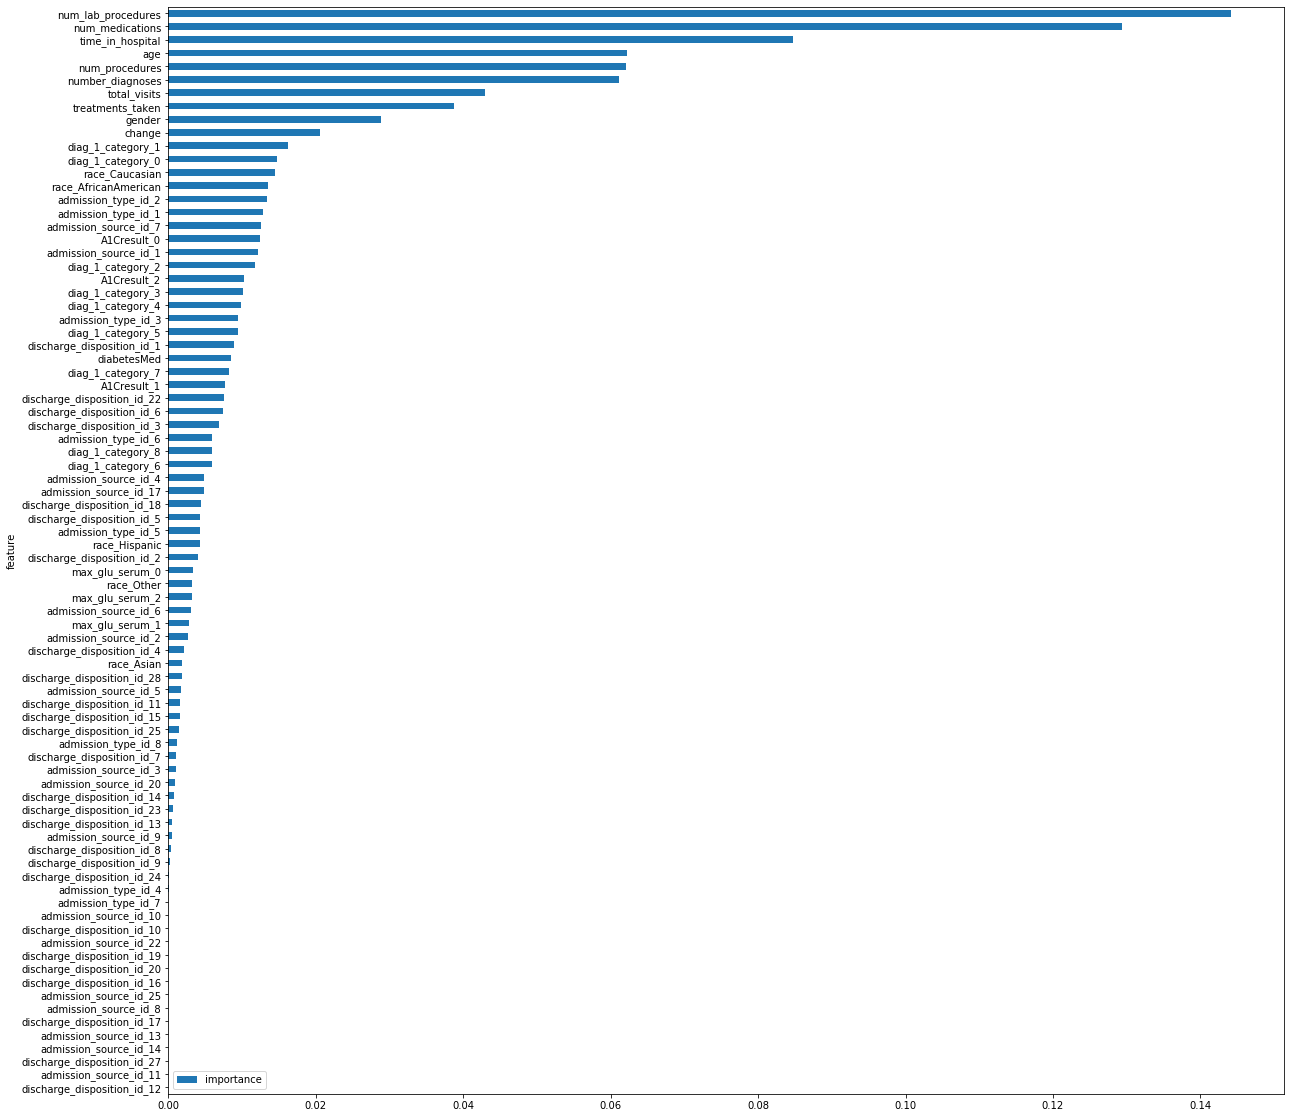

In [54]:
features.plot(kind='barh', figsize=(20, 20))

In [57]:
#deleting all the low important features starting from diag_1_category_8
low_importance_features = ['diag_1_category_8','admission_source_id_4', 'discharge_disposition_id_2','admission_source_id_17',\
      'discharge_disposition_id_18','admission_type_id_5','discharge_disposition_id_5','race_Hispanic',\
      'max_glu_serum_0', 'max_glu_serum_2', 'race_Other', 'admission_source_id_6','max_glu_serum_1',\
      'admission_source_id_2','discharge_disposition_id_4','admission_source_id_5', 'race_Asian', \
      'discharge_disposition_id_28','discharge_disposition_id_11','discharge_disposition_id_15',\
      'discharge_disposition_id_25','discharge_disposition_id_7', 'admission_type_id_8', 'admission_source_id_3',\
      'admission_source_id_20','discharge_disposition_id_23','discharge_disposition_id_14','discharge_disposition_id_13',\
      'discharge_disposition_id_8','discharge_disposition_id_16', 'admission_source_id_9', 'discharge_disposition_id_9','discharge_disposition_id_24',\
      'admission_type_id_4','admission_type_id_7','admission_source_id_10','discharge_disposition_id_19','discharge_disposition_id_17',\
      'admission_source_id_8','discharge_disposition_id_16','admission_source_id_25','discharge_disposition_id_10','discharge_disposition_id_20',\
      'admission_source_id_13','admission_source_id_11','admission_source_id_22','admission_source_id_14',\
      'discharge_disposition_id_27','discharge_disposition_id_12']


In [58]:
data_final = data1.drop(low_importance_features, axis = 1)

In [59]:
data_final

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,readmitted,...,diag_1_category_1,diag_1_category_2,diag_1_category_3,diag_1_category_4,diag_1_category_5,diag_1_category_6,diag_1_category_7,A1Cresult_0,A1Cresult_1,A1Cresult_2
0,0,5,1,41,0,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,15,3,59,0,18,9,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,25,2,11,5,13,6,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,35,2,44,1,16,7,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,45,1,51,0,8,5,1,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81405,0,45,14,73,6,26,9,1,1,0,...,0,0,0,0,0,0,1,0,0,1
81406,0,65,2,46,6,17,9,0,1,0,...,0,0,0,0,1,0,0,1,0,0
81408,0,0,5,76,1,22,9,1,1,0,...,0,0,0,0,0,0,0,1,0,0
81409,1,75,3,51,0,16,9,1,1,0,...,0,0,0,1,0,0,0,0,0,1


In [60]:
#removing the low_importance columns and creating a new dataframe

In [61]:
y = data_final['readmitted']

In [62]:
X = data_final.drop('readmitted',axis=1)

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.20, random_state=42)

# Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score

In [65]:
from sklearn.model_selection import cross_val_score

performance = []
for max_depth in [2,3,5,7,10]:
    dTree = DecisionTreeClassifier(criterion='entropy', class_weight = "balanced", max_depth=max_depth)
    performance.append((max_depth, np.mean(cross_val_score(dTree, X_train, Y_train, cv = 10, scoring = "f1_micro"))))

In [66]:
print(performance)
print("The best tree size is: ") 
str(sorted(performance, key = lambda x: x[1])[-1][0])

[(2, 0.4805196801561129), (3, 0.5048704164663225), (5, 0.5437684958169761), (7, 0.5630766435537302), (10, 0.5825569132069887)]
The best tree size is: 


'10'

In [64]:
X_train

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,total_visits,...,diag_1_category_1,diag_1_category_2,diag_1_category_3,diag_1_category_4,diag_1_category_5,diag_1_category_6,diag_1_category_7,A1Cresult_0,A1Cresult_1,A1Cresult_2
22990,1,75,3,55,1,19,6,0,0,3,...,0,0,0,0,0,0,0,1,0,0
40949,1,75,8,44,6,24,9,1,1,2,...,0,0,1,0,0,0,0,1,0,0
66248,1,65,4,68,2,13,9,0,0,0,...,1,0,0,0,0,0,0,0,0,1
12757,1,0,8,2,2,10,8,0,1,4,...,1,0,0,0,0,0,0,1,0,0
48624,0,65,5,54,0,24,8,1,1,1,...,0,1,0,0,0,0,0,1,0,0
40773,0,55,1,3,2,13,4,0,0,0,...,0,0,0,0,0,1,0,1,0,0
18202,0,65,2,62,0,13,9,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1603,0,45,4,56,0,10,4,1,1,2,...,0,0,0,1,0,0,0,0,0,1
54923,0,65,2,45,4,15,8,0,0,0,...,1,0,0,0,0,0,0,0,0,1
21521,1,65,7,70,3,12,9,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [67]:
from sklearn.model_selection import cross_val_score, KFold

dTree = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', max_depth = 5)
kf = KFold(n_splits=10, shuffle=True, random_state=0)
dTree.fit(X_train, Y_train)

print("Test Results:")
y_prediction = dTree.predict(X_test)
print(classification_report(Y_test, y_prediction))

Test Results:
              precision    recall  f1-score   support

           0       0.94      0.53      0.68     10664
           1       0.12      0.64      0.20      1041

    accuracy                           0.54     11705
   macro avg       0.53      0.58      0.44     11705
weighted avg       0.86      0.54      0.64     11705



# Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_normal = scaler.fit_transform(X_train)
X_test_normal = scaler.transform(X_test)

model = LogisticRegressionCV(Cs = 10, cv = 10, class_weight = "balanced")
model.fit(X_train_normal, Y_train)

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [69]:
y_prediction = model.predict(X_test_normal)
print(classification_report(y_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.66      0.93      0.77      7499
           1       0.52      0.13      0.21      4206

    accuracy                           0.64     11705
   macro avg       0.59      0.53      0.49     11705
weighted avg       0.61      0.64      0.57     11705



# Reading the test dataset

In [71]:
#updated file path to be functional_em
data2=pd.read_csv("~/Documents/Discharge-Planning-App/Hospital-Readmission-Prediction/test_data.csv",header=0,skiprows=0,engine='python')
ids = data2['encounter_id']
data2[ids.isin(ids[ids.duplicated()])]
data2 = data2.replace('?', np.NaN )
data2 = data2.replace('Unknown/Invalid', np.NaN )



In [72]:
data2.drop(['weight','payer_code','medical_specialty','diag_2', 'diag_3'],axis=1,inplace=True)
data2.dropna(inplace=True)
data2.drop(['examide','citoglipton'],axis=1,inplace=True)
data2['change'] = data2['change'].apply(lambda x: 0 if x == "No" else 1)
data2['gender'] = data2['gender'].apply(lambda x: 0 if x == "Female" else 1)
data2['diabetesMed'] = data2['diabetesMed'].apply(lambda x: 0 if x == "No" else 1)
data2['total_visits'] = data2['number_outpatient'] + data2['number_emergency'] + data2['number_inpatient']
def agecategory(x):
    
    if x == "[0-10)" :
        return 5
    elif x == "[10-20)":
        return 15
    elif x == "[20-30)":
        return 25
    elif x == "[30-40)":
        return 35
    elif x == "[40-50)":
        return 45
    elif x == "[50-60)":
        return 55
    elif x == "[60-70)":
        return 65
    elif x == "[70-80)":
        return 75
    else:
        return 0
data2['age'] = data2['age'].apply(lambda x: agecategory(x))
treatments = ['metformin' ,'repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide' ,'glipizide',\
              'glyburide', 'tolbutamide', 'pioglitazone','rosiglitazone', 'acarbose' ,'miglitol' ,'troglitazone', \
              'tolazamide', 'insulin' ,'glyburide-metformin','glipizide-metformin', \
              'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']
for i in treatments:
    data2[i] = data2[i].apply(lambda x: 0 if x == "No" else 1)
data2['treatments_taken'] = np.zeros((len(data2['metformin'])))
for col in treatments:
    data2['treatments_taken'] += data2[col]
    
data2['A1Cresult'] = data2['A1Cresult'].apply(lambda x: 0 if x == "None" else (1 if x=="Norm" else 2) )
data2['max_glu_serum'] = data2['max_glu_serum'].apply(lambda x: 0 if x == "None" else (1 if x=="Norm" else 2) )

def getCategor(x):
    if 'V' in str(x) or 'E' in str(x):
        return 0
    
    x = float(x)
    
    if (x >= 390 and x <= 459) or np.floor(x) == 785:
        return 1
    elif (x >= 460 and x <= 519) or np.floor(x) == 786:
        return 2
    elif (x >= 520 and x <= 579) or np.floor(x) == 787:
        return 3
    elif np.floor(x) == 250:
        return 4
    elif x >= 800 and x <= 999:
        return 5
    elif x >= 710 and x <= 739:
        return 6
    elif (x >= 580 and x <= 629) or np.floor(x) == 788:
        return 7
    elif x >= 140 and x <= 239:
        return 8
    else:
        return 0

data2['diag_1_category'] = data2['diag_1'].apply(lambda x: getCategor(x))

patients = data2['patient_nbr']
data2[patients.isin(patients[patients.duplicated()])]
data2 = data2.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
data2['admission_type_id'] = data2['admission_type_id'].astype('object')
data2['admission_source_id'] = data2['admission_source_id'].astype('object')
data2['discharge_disposition_id'] = data2['discharge_disposition_id'].astype('object')
data2['diag_1_category'] = data2['diag_1_category'].astype('object')
data2['max_glu_serum'] = data2['max_glu_serum'].astype('object')
data2['A1Cresult'] = data2['A1Cresult'].astype('object')

delete_columns = ['patient_nbr','number_outpatient','number_emergency','number_inpatient',\
                 'metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide'\
                  ,'glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone' \
                  ,'tolazamide','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone',\
                  'metformin-rosiglitazone','metformin-pioglitazone','diag_1']

data2.drop(delete_columns, inplace=True, axis=1)

categorical=data2.select_dtypes(include=['object'])
numeric=data2.select_dtypes(exclude=['object'])

nominal_columns = ['race', 'admission_type_id', 'discharge_disposition_id','admission_source_id' ,'diag_1_category'\
                  , 'max_glu_serum', 'A1Cresult']
dummy_df = pd.get_dummies(data2[nominal_columns])
data2 = pd.concat([data2, dummy_df], axis=1)
data2 = data2.drop(nominal_columns, axis=1)

low_importance_features = ['diag_1_category_8','admission_source_id_4', 'discharge_disposition_id_2','admission_source_id_17',\
      'discharge_disposition_id_18','admission_type_id_5','discharge_disposition_id_5','race_Hispanic',\
      'max_glu_serum_0', 'max_glu_serum_2', 'race_Other', 'admission_source_id_6','max_glu_serum_1',\
      'admission_source_id_2','discharge_disposition_id_4','admission_source_id_5', 'race_Asian', \
      'discharge_disposition_id_28','discharge_disposition_id_11','discharge_disposition_id_15',\
      'discharge_disposition_id_25','discharge_disposition_id_7', 'admission_type_id_8', 'admission_source_id_3',\
      'admission_source_id_20','discharge_disposition_id_23','discharge_disposition_id_14','discharge_disposition_id_13',\
      'discharge_disposition_id_8', 'admission_source_id_9', 'discharge_disposition_id_9','discharge_disposition_id_24',\
      'admission_type_id_4','admission_type_id_7','discharge_disposition_id_19','discharge_disposition_id_17',\
      'admission_source_id_8','discharge_disposition_id_10',\
      'admission_source_id_22','admission_source_id_14',\
      'discharge_disposition_id_27']


data2= data2.drop(low_importance_features, axis=1)

In [70]:
data2[0:3]

,encounter_id,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,...,diag_1_category_1,diag_1_category_2,diag_1_category_3,diag_1_category_4,diag_1_category_5,diag_1_category_6,diag_1_category_7,A1Cresult_0,A1Cresult_1,A1Cresult_2
0,15738,0,0,12,33,3,18,8,1,1,...,1,0,0,0,0,0,0,1,0,0
1,62256,0,65,1,49,5,2,8,0,1,...,0,1,0,0,0,0,0,1,0,0
3,183930,0,0,11,42,2,19,8,0,0,...,0,0,0,0,0,0,0,1,0,0


In [74]:
data2new= data2.iloc[:,1:35] 

In [75]:
#predicting using Decision Tree Classifier
y_prediction_DTC = dTree.predict(data2new[1:])

In [76]:
data2new = data2new.reset_index(drop=True)

In [77]:
print(data2new.isnull().sum())

gender                         0
age                            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_diagnoses               0
change                         0
diabetesMed                    0
total_visits                   0
treatments_taken               0
race_AfricanAmerican           0
race_Caucasian                 0
admission_type_id_1            0
admission_type_id_2            0
admission_type_id_3            0
admission_type_id_6            0
discharge_disposition_id_1     0
discharge_disposition_id_3     0
discharge_disposition_id_6     0
discharge_disposition_id_22    0
admission_source_id_1          0
admission_source_id_7          0
diag_1_category_0              0
diag_1_category_1              0
diag_1_category_2              0
diag_1_category_3              0
diag_1_category_4              0
diag_1_category_5              0
diag_1_category_6              0
diag_1_cat

In [78]:
#predicting using logistic regression classifier
data2_scalar = scaler.fit_transform(data2new)
y_prediction_LRC = model.predict(data2_scalar)

In [79]:
predicted_probability = model.predict_proba(data2_scalar)

In [80]:
predicted_probability = pd.DataFrame(predicted_probability)


In [81]:
data2['y_prediction_LRC'] = pd.DataFrame(y_prediction_LRC)


In [82]:
data2['y_prediction_DTC'] = pd.DataFrame(y_prediction_DTC)[0]

In [83]:
data2['predicted_probability_LR_0'] = pd.DataFrame(predicted_probability)[0]

In [84]:
data2['predicted_probability_LR_1'] = pd.DataFrame(predicted_probability)[1]

In [85]:
predicted_probability_decisiontree = dTree.predict_proba(data2new)
data2['predicted_probability_decisiontree_0'] = pd.DataFrame(predicted_probability_decisiontree)[0]
data2['predicted_probability_decisiontree_1'] = pd.DataFrame(predicted_probability_decisiontree)[1]

In [86]:
data2[0:3]

,encounter_id,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,...,diag_1_category_7,A1Cresult_0,A1Cresult_1,A1Cresult_2,y_prediction_LRC,y_prediction_DTC,predicted_probability_LR_0,predicted_probability_LR_1,predicted_probability_decisiontree_0,predicted_probability_decisiontree_1
0,15738,0,0,12,33,3,18,8,1,1,...,0,1,0,0,1.0,0.0,0.415125,0.584875,0.415616,0.584384
1,62256,0,65,1,49,5,2,8,0,1,...,0,1,0,0,0.0,1.0,0.617377,0.382623,0.624435,0.375565
3,183930,0,0,11,42,2,19,8,0,0,...,0,1,0,0,0.0,0.0,0.595506,0.404494,0.702513,0.297487


predicted_probability_LR_0 = Predicted probability using Logistic Regression Classification for 0 

predicted_probability_LR_1 = Predicted probability using Logistic Regression Classification for 1 

y_prediction_LRC = Predicted readmission using Logistic Regression Classification. 

predicted_probability_decisiontree_0 = Predicted probability using Decision Tree Classification for 0 

predicted_probability_decisiontree_1 = Predicted probability using Decision Tree Classification for 1 

y_prediction_DTC = Predicted readmission using Decision Tree Classification.

In [87]:
prediction=data2[['encounter_id','predicted_probability_LR_0','predicted_probability_LR_1', \
                  'y_prediction_LRC','predicted_probability_decisiontree_0','predicted_probability_decisiontree_1',\
                  'y_prediction_DTC']]

In [88]:
prediction[0:4]

,encounter_id,predicted_probability_LR_0,predicted_probability_LR_1,y_prediction_LRC,predicted_probability_decisiontree_0,predicted_probability_decisiontree_1,y_prediction_DTC
0,15738,0.415125,0.584875,1.0,0.415616,0.584384,0.0
1,62256,0.617377,0.382623,0.0,0.624435,0.375565,1.0
3,183930,0.595506,0.404494,0.0,0.702513,0.297487,0.0
4,248916,0.533118,0.466882,0.0,0.523610,0.476390,0.0


In [89]:
prediction.to_csv("prediction.csv")